In [143]:
# The following allows multiple outputs in a single output cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Here we move on from univariate multiple linear regression models to touch briefly on models for dependent variables that are "limited," that cannot take on all possible values on $R$. That is, Y isn't continuous.  Y variables of this type include categorical variables, either ordered or unordered, and counts.  

Then, we consider _locally weighted regression_, and after that, Bayesian regression modeling.

### A Digression on Measurement

Reflect back a minute on the previous regression example that was about inpatient satisfaction.  We assumed that the rating scale data are equal interval, continuous measures.  Certainly the _numerical_ difference, say, between ratings responses of 4 and 5 is the same as that for 7 and 8.

But what if such differences between between two numeric responses on these scales didn't always represent equal _psychological_ intervals, equal differences in perception or affect? What if the numbers are just labels for categories that are ordered, like ranks of experiences?

A measurement taxonomy widely adopted in social science measurement is the [_Levels of Measurement_](https://en.wikipedia.org/wiki/Level_of_measurement) classification described by S.S. Stevens.  Stevens defined four types of measurement scales in terms of their properties and the kinds of mathematical operations that are appropriate for use on data on them.  The four types are:  

* nominal - unordered categories, measures are classifications or memberships
* ordinal - ordered categories e.g. comparisons of rankings
* interval - metric differences, math operations not requiring an absolute origin, e.g. addition, subtraction
* ratio - magnitudes and metric quantities, operations accommodating absolute measurement scale origins  

What can be assumed about the level of measurement of psychological scales has implications for how it's best to model it or to statistically describe it.  It may make sense to average household incomes, but it doesn't make sense to do so with the names of members of a household.  

**QUESTION**  
What if the patient satisfaction data were ordinal measures?  How might that change how you would approach regressing stated satisfaction on the other variables?

### Limited Y Variables

Many different probability distributions can be used to describe real world data, even when the data of interest is limited in some manner. Here's a very nice explanation of several important probability distributions:  

[Common Probability Distributions](http://blog.cloudera.com/blog/2015/12/common-probability-distributions-the-data-scientists-crib-sheet/)  

For considerably more detail, see:  

[Univariate Distributions](http://www.math.wm.edu/~leemis/chart/UDR/UDR.html)

When the data on a criterion variable don't span $R$, regression modeling can get difficult.  But fortunately it's possible to estimate regression models for a several kinds of limited Y variables without having to give up the simplicity and convenience of working with models that are linear in their parameters. This is a characteristic of models that can be estimated as _general linear models_, sometimes called generalized linear models, or "glm's."  This class of mSethods includes models for predicting a broad range of dependent variables, like counts, unordered categories, and variables that are left- and/or right-truncated.

### GLM model specification

The specification of a glm consists of passing the parameter-weighted linear combination of predictor variables through a _link function_ so that the behavior of values on Y can be approximated:  

$$\mathbf{E} (Y_i) = g^{-1}(X_i\beta)$$  

Here, g is the link function.  Link functions can be specified in many statistical programming environments to relate $X_i\beta$ to several useful distribution functions, e.g., the binomial, negative binomial, Poisson, and gamma. 

These models are not estimated OLS, but with iterative ML methods. 

The `statsmodels' includes code for estimating several different [kinds of glm](http://www.statsmodels.org/stable/glm.html#module-reference).

### Flexible Regression: Lowess

A very useful type of regression method is a non-parametric procedure called _loess_ (for local regression), or _lowess_ (locally weighted scatterplot regression).   Loess fits data using a local weight function such that predictor variables are weighted relative to individual data points.  It _doesn't_ require that a model functional form be specified a priori. It is computationally intensive, however. 


### Smooth Going (Lowess)

Let's grab some data and try Lowess.  The EPA has published data on radon levels from about 80,000 households that include an indicator of the floor in a household at which which measurement was made, the county of residence, uranium levels, and several other variables.  Let's load the data.  

`statsmodels` has a method called [lowess](http://www.statsmodels.org/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) the could use. Here we'll first try using `seaborn` to just plot our loess results, as it's easy and it makes a nice picture. It actually calls `statsmodels` to get regression results.  Then if we need some additional control over the regression, we'll try with `statsmodels`.

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [145]:
%matplotlib inline

In [146]:
epaData=pd.read_csv('radon.csv')
epaData.shape

(919, 30)

This is a subset of the EPA data. Let's select the columns (variables) we want to look at and/or that we'll use loess on:

In [147]:
epaData2=epaData[['log_radon','floor','Uppm']]

*log_radon* is the log of the recorded radon level in a house. *floor* is the floor of the house that the radon measurement was made on.  0 is basement, 1 is first, etc. *Uppm* is a county-level uranium measure.  

To make things simpler and faster, let's randomly sample this data to get 100 cases:  

In [148]:
selCases=np.random.choice(range(len(epaData2)-1),size=100)

In [149]:
epaData100=epaData2.loc[selCases]
epaData100.shape
epaData100.head()

(100, 3)

,log_radon,floor,Uppm
483,1.193922,0.0,1.024240
205,1.252763,0.0,0.976144
121,2.104134,0.0,0.479352
762,-1.203973,0.0,0.622088
127,0.470004,0.0,1.410270


Now, some seaborn:

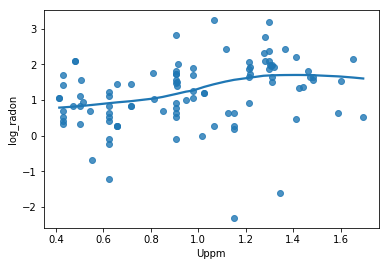

In [150]:
lowPlot1=sns.regplot(epaData100.Uppm,epaData100.log_radon,lowess=True)
plt.show()

There's not a lot of "flex" in the loess line, but you can see some bend in it.   

Let's try `statsmodels`:

In [151]:
import statsmodels.api as sm
lowess = sm.nonparametric.lowess

In [152]:
#sorting the data
#epaData100.Uppm.value_counts()
epaDataSort=epaData100.sort_values('Uppm',ascending=True,kind="mergesort")

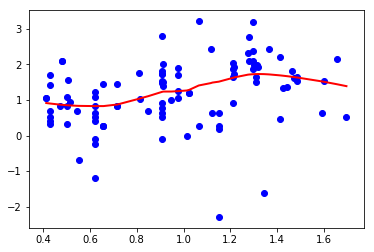

In [153]:
x=epaDataSort.Uppm.values
y=epaDataSort.log_radon.values
plt.scatter(x,y,color='blue')
ys=lowess(y,x,
          is_sorted=True,return_sorted=True,frac=0.55,delta=0.0,it=3)[:,1]
_ = plt.plot(x,ys,'red',linewidth=2)

You can get *predicted* values from a lowess regression with a little fiddling, although prediction is not what it was developed for.  See [prediction with lowess on StackOverflow](https://stackoverflow.com/questions/36252434/predicting-on-new-data-using-locally-weighted-regression-loess-lowess).

### That's All For Now!

Time is short, and we need to move one to the next topic.  Be sure to review the online documentation for `statsmodels.`  You'll see that the capabilities of this statistics package are very broad.  There always can be something missing that you need.  The `scipy` package can sometimes provide useful and complementary functionality.